# 3.3.5(4.11A). Эффект Холла в металлах

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 
from scipy.interpolate import interp1d
#%matplotlib inline
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1], so

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Cхема установки

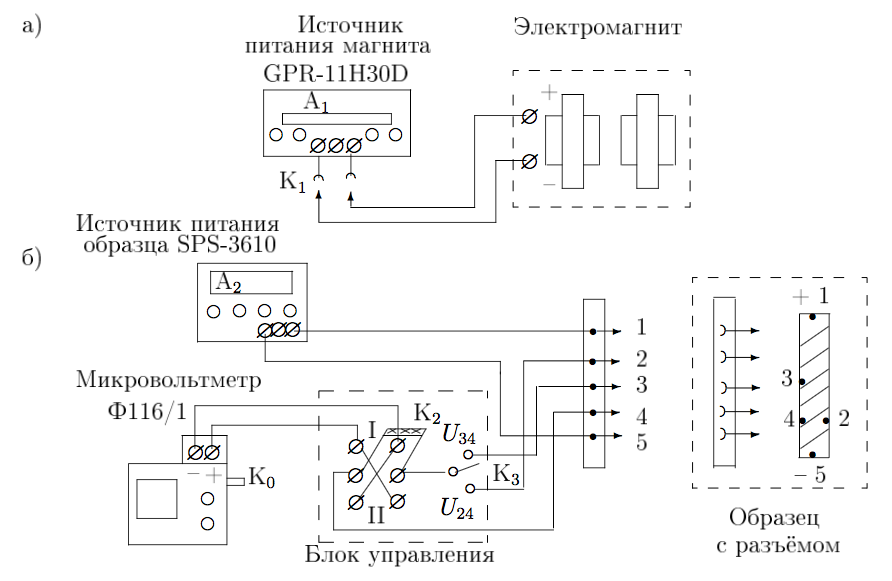

In [23]:
Image(filename='/Users/yaroslavtominin/Desktop/MIPT/лабы/электричество/lab8.png')

# $\sigma = \frac{I L_{34}}{U_{34}al}$


# $\xi=-R_x\frac{IB}{a},R_x=\frac{1}{ne}$

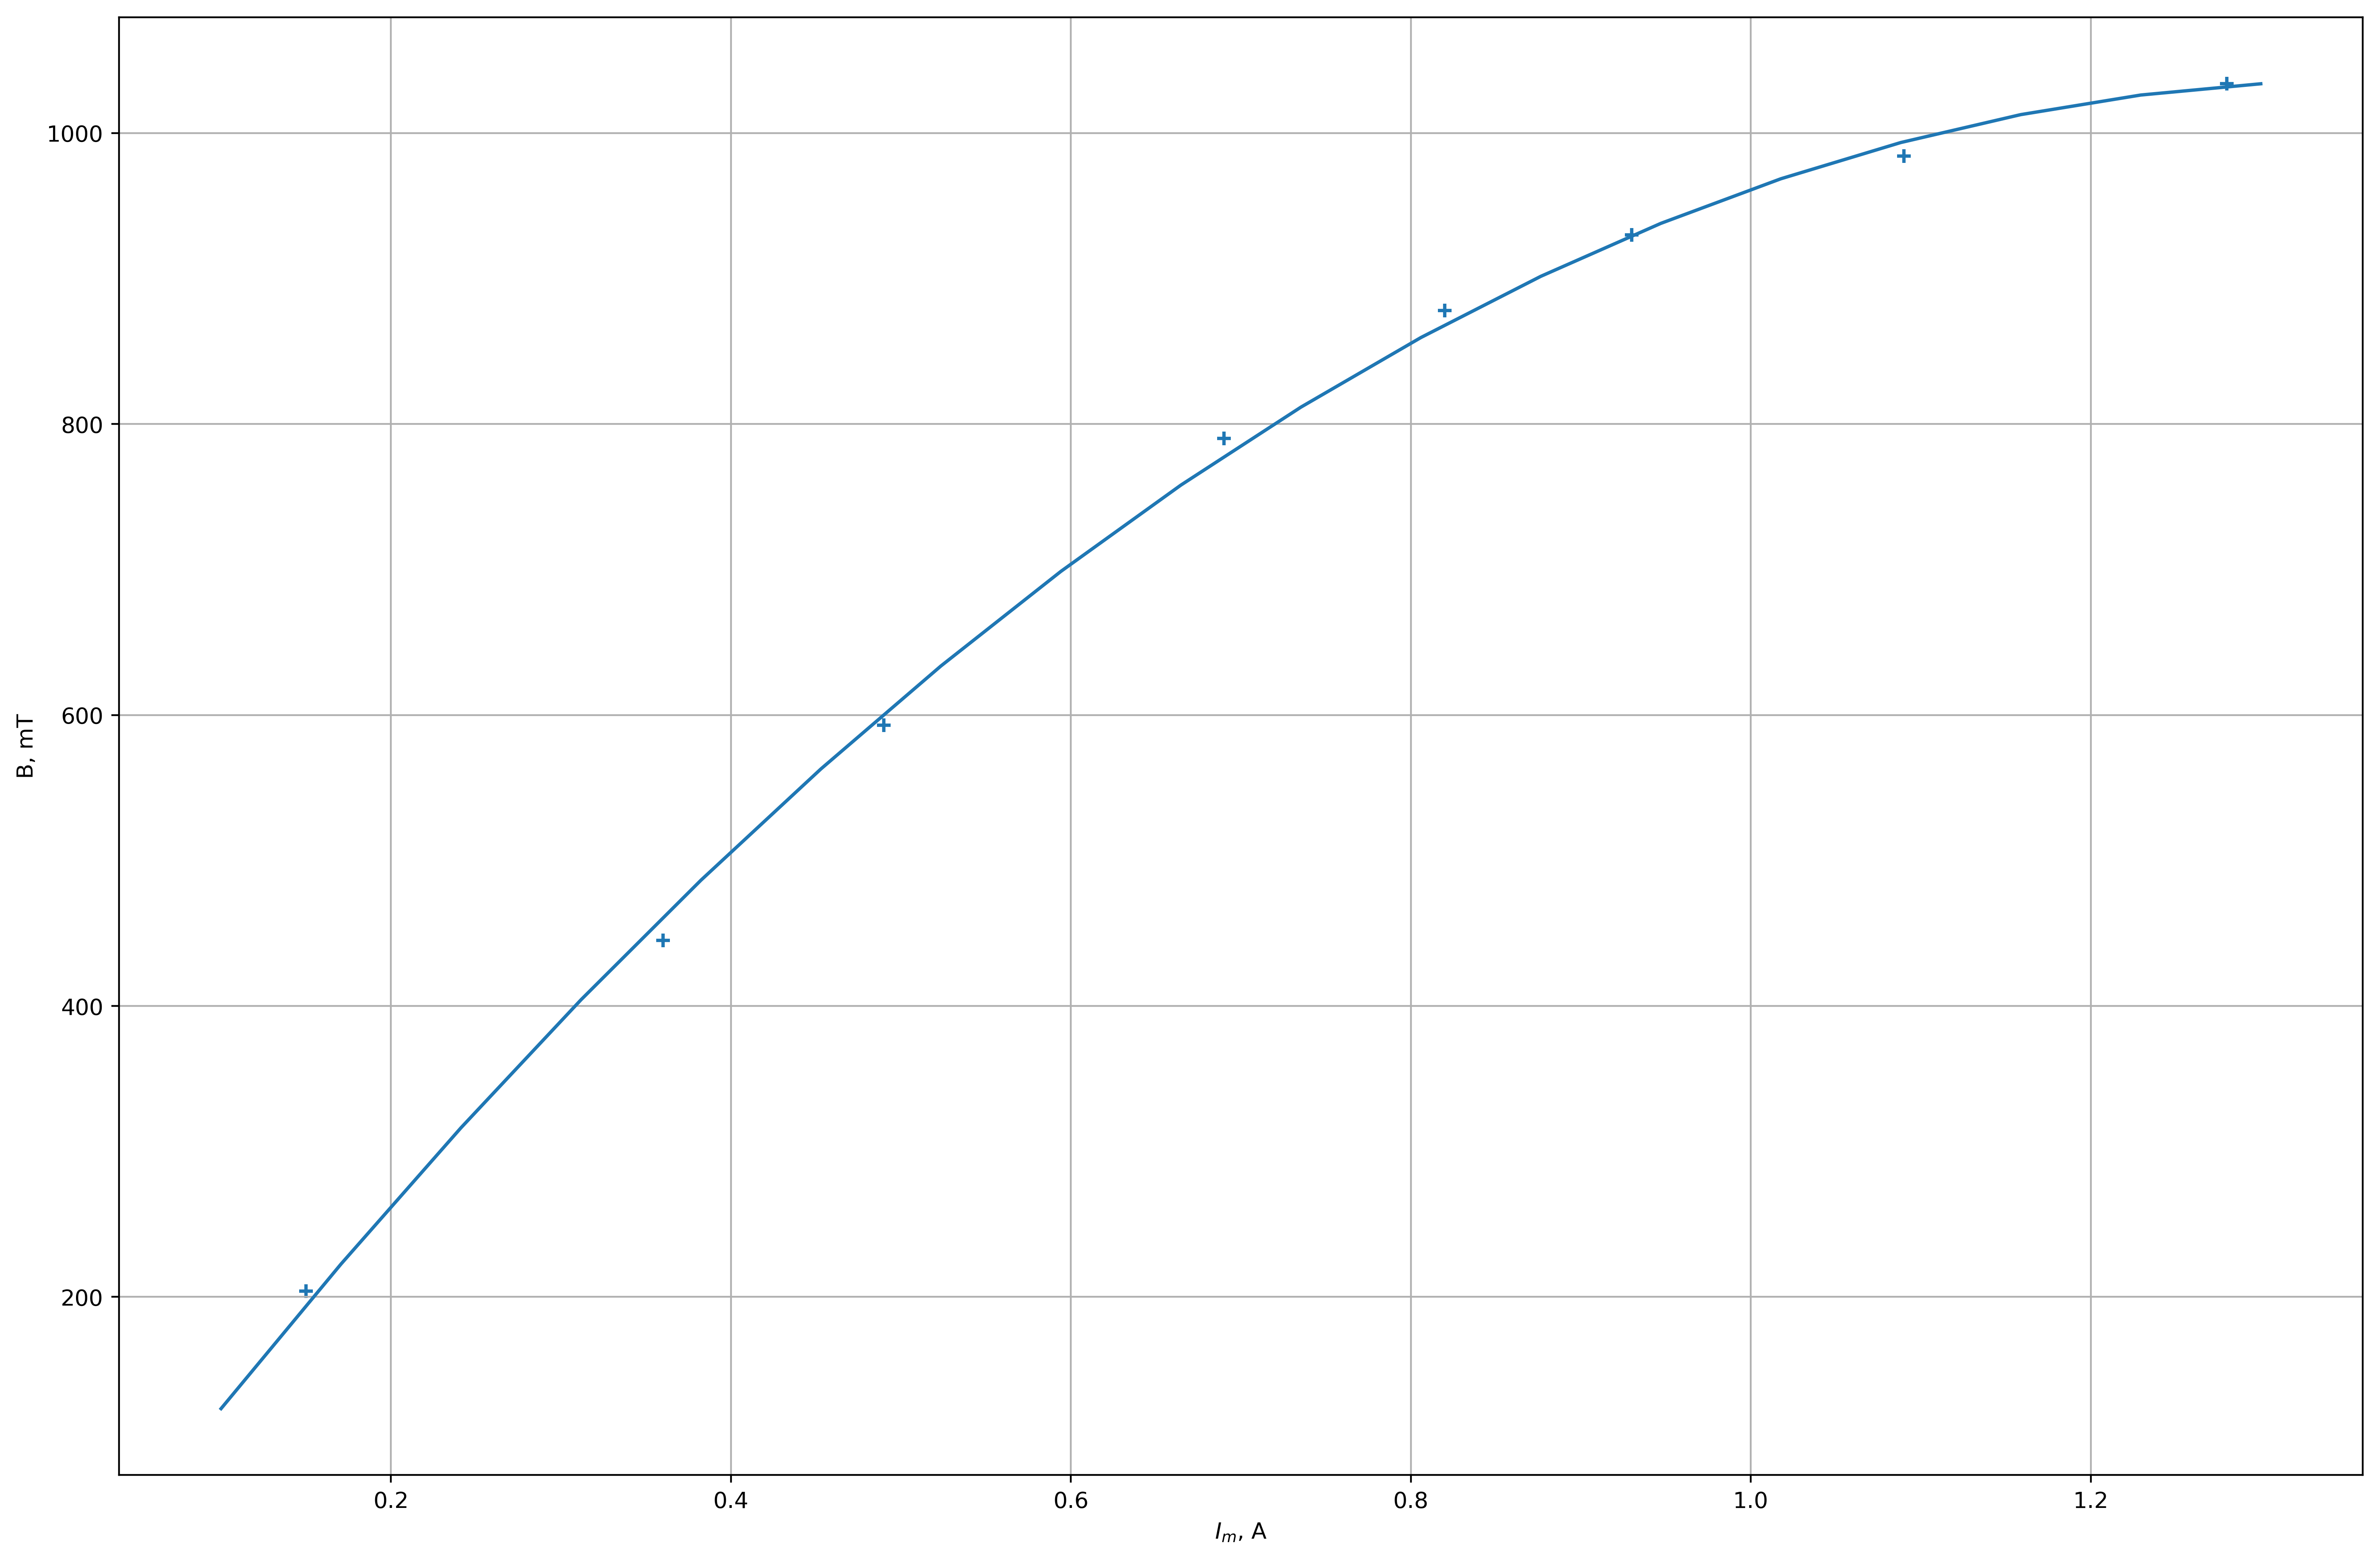

In [24]:
B = np.array([1034,984,930,878,790,593,445,204])
I_m = np.array([1.28,1.09,0.93,0.82,0.69,0.49,0.36,0.15])


x = np.linspace(0.1,1.3,18)
a,b,c = sp.polyfit(I_m, B, 2)
B_sq = a*x**2 + b*x + c
plt.figure(figsize=(18, 12), dpi=80)


plt.scatter(I_m, B, marker='+')
plt.plot(x, B_sq)
plt.ylabel("B, mT")
plt.xlabel(f"$I_m$, A")

#plt.scatter(lowess[:, 0], lowess[:, 1])
plt.grid(True)
plt.show()

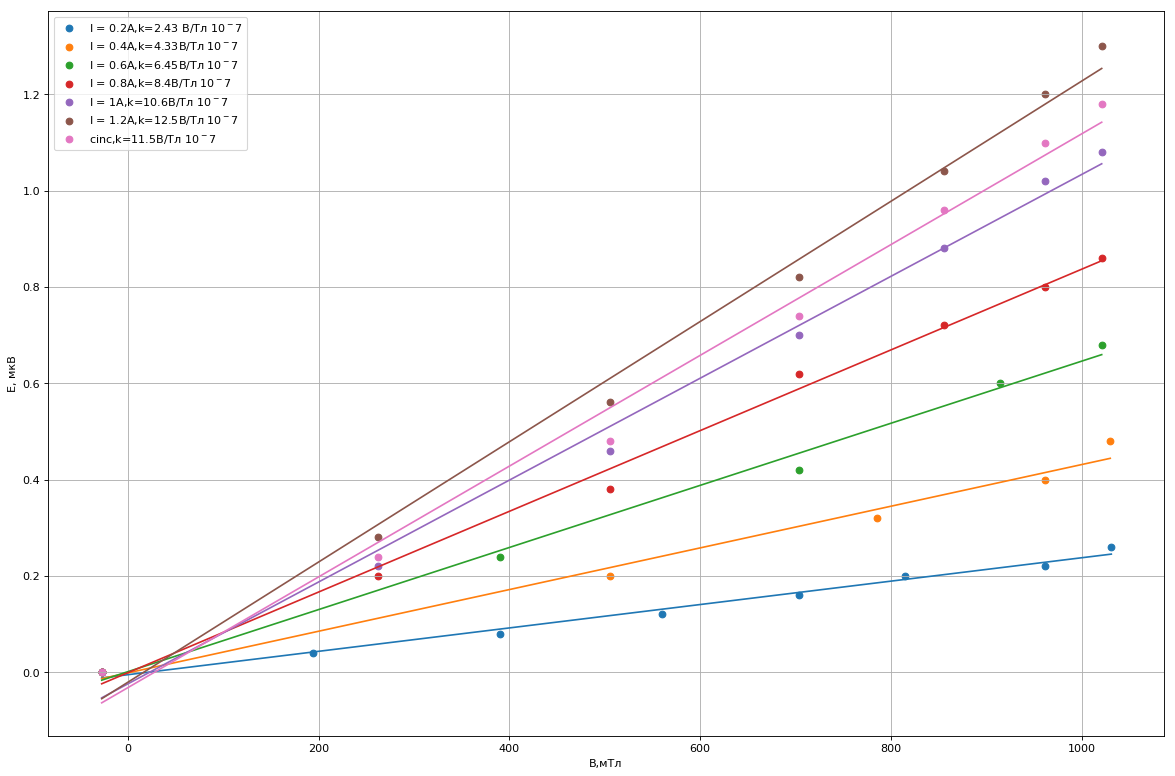

In [27]:
I_02 = np.array([0,0.15,0.30,0.45,0.60,0.74,1,1.27])
U_02 = np.array([0,0.1,0.2,0.3,0.4,0.5,0.55,0.65])/2.5
B_02 = a*I_02**2 + b*I_02 + c
a2,b2=sp.polyfit(B_02,U_02,1)
y_02=a2*B_02+b2

I_04 = np.array([0,0.4,0.7,1,1.26])
U_04 = np.array([0,0.5,0.8,1,1.2])/2.5
B_04 = a*I_04**2 + b*I_04 + c
a4,b4=sp.polyfit(B_04,U_04,1)
y_04=a4*B_04+b4

I_06 = np.array([0,0.30,0.60,0.90,1.2])
U_06 = np.array([0,0.6,1.05,1.5,1.7])/2.5
B_06 = a*I_06**2 + b*I_06 + c
a6,b6=sp.polyfit(B_06,U_06,1)
y_06=a6*B_06+b6

I_08=np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
U_08=np.array([0,0.5,0.95,1.55,1.8,2.0,2.15])/2.5
B_08 = a*I_08**2 + b*I_08 + c
a8,b8=sp.polyfit(B_08,U_08,1)
y_08=a8*B_08+b8

I_1=np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
U_1=np.array([0,0.55,1.15,1.75,2.2,2.55,2.70])/2.5
B_1 = a*I_1**2 + b*I_1 + c
a10,b10=sp.polyfit(B_1,U_1,1)
y_1=a10*B_1+b10

I_12=np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
U_12=np.array([0,0.7,1.4,2.05,2.6,3.0,3.25])/2.5
B_12 = a*I_12**2 + b*I_12 + c
a12,b12=sp.polyfit(B_12,U_12,1)
y_12=a12*B_12+b12

I_cinc=np.array([0,0.2,0.4,0.6,0.8,1.0,1.2])
U_cinc=(np.array([17.5,23.5,29.5,36,41.5,45,47])-17.5)/25
B_cinc = a*I_cinc**2 + b*I_cinc + c
a_cnc,b_cnc=sp.polyfit(B_cinc,U_cinc,1)
y_cinc=a_cnc*B_cinc+b_cnc
plt.figure(figsize=(18, 12), dpi=80)


plt.scatter(B_02, U_02, label = f"I = 0.2A,k={round(a2*10**4,2)} В/Тл $10^{-7}$")
plt.scatter(B_04, U_04, label = f"I = 0.4A,k={round(a4*10**4,2)}В/Тл $10^{-7}$")
plt.scatter(B_06, U_06, label = f"I = 0.6A,k={round(a6*10**4,2)}В/Тл $10^{-7}$")
plt.scatter(B_08, U_08, label = f"I = 0.8A,k={round(a8*10**4,1)}В/Тл $10^{-7}$")
plt.scatter(B_1, U_1, label = f"I = 1A,k={round(a10*10**4,1)}В/Тл $10^{-7}$")
plt.scatter(B_12, U_12, label = f"I = 1.2A,k={round(a12*10**4,1)}В/Тл $10^{-7}$")
plt.scatter(B_cinc, U_cinc, label = f"cinc,k={round(a_cnc*10**4,1)}В/Тл $10^{-7}$")
#x1=np.array(np.linspace(0,1050,7))

plt.plot(B_02, y_02)
plt.plot(B_04, y_04)
plt.plot(B_06, y_06)
plt.plot(B_08, y_08)
plt.plot(B_1, y_1)
plt.plot(B_12, y_12)
plt.plot(B_cinc, y_cinc)

plt.grid(True)
plt.xlabel("B,мТл")
plt.ylabel(f"E, мкВ")
plt.legend()

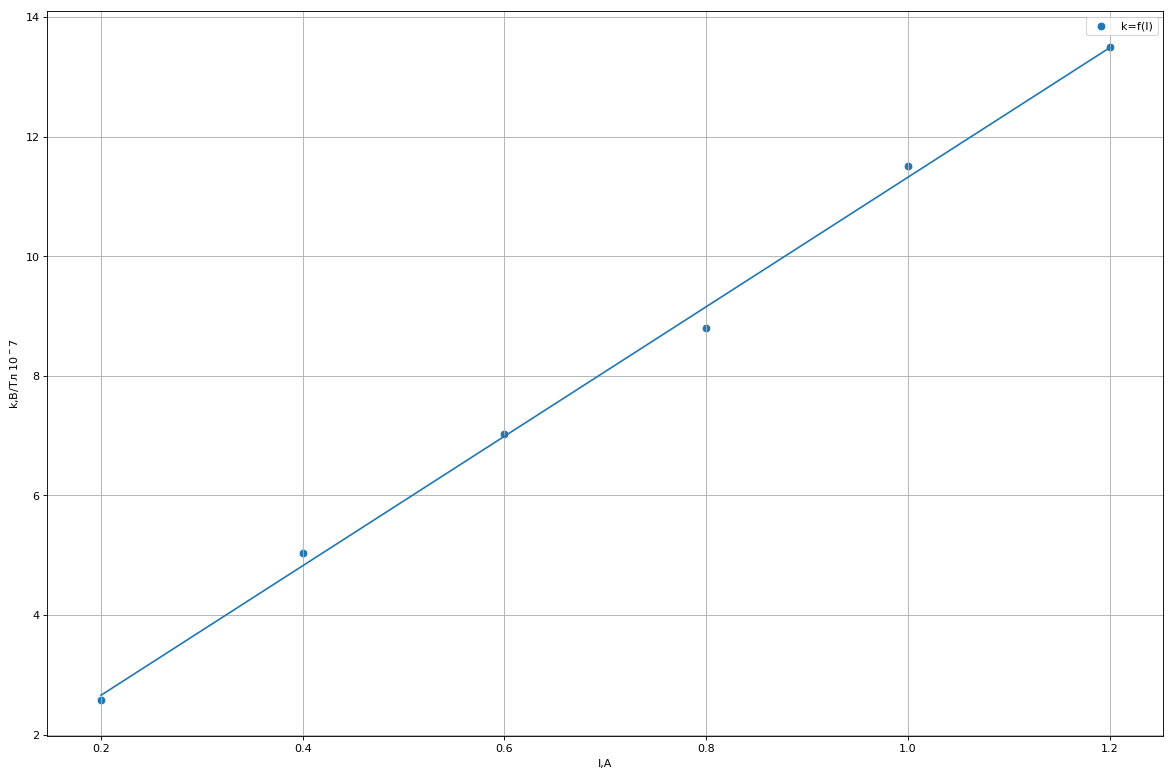

In [37]:
k_mas=np.array([2.58,5.03,7.02,8.8,11.5,13.5])
I=np.array([0.2,0.4,0.6,0.8,1,1.2])
a,b=sp.polyfit(I,k_mas,1)
y=a*I+b
_a,_b,delta_k=mnkGP(I,k_mas)
delta_k=delta_k*10**(-7)
plt.figure(figsize=(18, 12), dpi=80)
plt.plot(I,y)
plt.scatter(I,k_mas,label="k=f(I)")
plt.legend()
plt.xlabel(f"I,A")
plt.ylabel(f"k,В/Тл $10^{-7}$")
plt.grid(True)
k_res=a*10**(-7)

# $ k_{res}=\frac{R_x}{a}$

In [54]:
a=0.09*10**(-3)

R_x=k_res*a
delta_R_x=delta_k/k_res*R_x
#print(f"$R_x$={round(R_x,13)}+-{round(delta_R_x,12)}")
print('R_x=(97+-3)*10^(-12) м^3/Кл')
n=1/R_x/1.6/10**(-19)
print(n)

R_x=(97+-3)*10^(-12) м^3/Кл
6.413921508261131e+28


### Расчет проводимости

# $\sigma = \frac{I L_{34}}{U_{34}al}$


# $\delta \sigma =\frac{\delta U_{34}}{U_{34}}\sigma$



In [59]:
sigma_sil=1*15*10**9/0.09/11/315
delta_sigma_sil=1/31*sigma_sil
sigma_cnc=1*3.5*10**9/290/0.12/10.5
delta_sigma_cnc=1/31*sigma_cnc
B_sil=sigma_sil*R_x
#print(B_sil)
#print(sigma_sil,sigma_cnc)

In [56]:
frame=pd.DataFrame({'Металл':['Серебро','Цинк'],f'R_x+-∆R_x 10^(-10),m^3/Kl':['0.97+-0.03','0'],'табл R':[0.09,0],'знак носит.':['отрицательный','положительный'],
                    'n+-∆n *10^28,1/m^3':['6.4+-0.2','0'],'(sigma+-∆sigma)*10^6,1/(Om*m)':['48.1+-0.2','0'],f'b,cm^2/(B*c)':[0,0]})
frame

,"(sigma+-∆sigma)*10^6,1/(Om*m)","R_x+-∆R_x 10^(-10),m^3/Kl","b,cm^2/(B*c)","n+-∆n *10^28,1/m^3",Металл,знак носит.,табл R
0,48.1+-0.2,0.97+-0.03,0,6.4+-0.2,Серебро,отрицательный,0.09
1,0,0,0,0,Цинк,положительный,0.00


In [ ]:
scores = np.load('scores1val.npy')
